## Part 4 Logistic Regression Model

In [1]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

plt.rcParams['figure.dpi']= 150
sns.set(style="whitegrid")

## Split training data into training dataset and validation dataset

In [2]:
# Read raw training data
data = pd.read_csv("cleaned_train_data.csv")

# It is better to choose random_state=42
train, test = train_test_split(data, test_size=0.2, random_state=42, shuffle=True)
print("train.shape: ", train.shape)
print("test.shape: ", test.shape)

X_train = train.comment_text
X_test = test.comment_text

train.shape:  (127656, 8)
test.shape:  (31915, 8)


In [3]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
140030,ed56f082116dcbd0,grandma terri should burn in trash grandma ter...,1,0,0,0,0,0
159124,f8e3cd98b63bf401,may etc it would be easiest if you were to adm...,0,0,0,0,0,0
60006,a09e1bcf10631f9a,the objectivity of this discussion is doubtful...,0,0,0,0,0,0
65432,af0ee0066c607eb8,shelly shock shelly shock is,0,0,0,0,0,0
154979,b734772b1a807e09,i do not care refer to on ten hong talk page i...,0,0,0,0,0,0


In [4]:
test.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
119105,7ca72b5b9c688e9e,geez are you forgetful weave already discussed...,0,0,0,0,0,0
131631,c03f72fd8f8bf54f,carioca fra thanks for your support on my requ...,0,0,0,0,0,0
125326,9e5b8e8fc1ff2e84,birthday no worries its what i do enjoy or day...,0,0,0,0,0,0
111256,5332799e706665a6,pseudoscience category i'm assuming that this ...,0,0,0,0,0,0
83590,dfa7d8f0b4366680,and if such phrase exists it would be provided...,0,0,0,0,0,0


## Search regularization value for logistic regression model

In [5]:
tfidfVec = TfidfVectorizer(stop_words="english")
X_train_tfidf = tfidfVec.fit_transform(X_train)
X_test_tfidf = tfidfVec.transform(X_test)
print(X_train_tfidf.shape)
print(X_test_tfidf.shape)

(127656, 56192)
(31915, 56192)


In [53]:
train_scores = []
test_scores = []
for regularization in range(1, 50, 5):
    clf = LogisticRegression(dual=True, C=regularization, solver="liblinear").fit(X_train_tfidf, train["toxic"])
    train_score = classification_report(train["toxic"], clf.predict(X_train_tfidf), output_dict=True)
    test_score = classification_report(test["toxic"], clf.predict(X_test_tfidf), output_dict=True)
    train_scores.append(train_score["accuracy"])
    test_scores.append(test_score["accuracy"])

In [54]:
train_scores_df = pd.concat([pd.DataFrame(train_scores, columns=["value"]), pd.DataFrame([x for x in range(1, 50, 5)], columns=["regularization_value"]), pd.DataFrame(["train_score"]*len(train_scores), columns=["score_type"])], axis=1)
test_scores_df = pd.concat([pd.DataFrame(test_scores, columns=["value"]), pd.DataFrame([x for x in range(1, 50, 5)], columns=["regularization_value"]), pd.DataFrame(["test_score"]*len(test_scores), columns=["score_type"])], axis=1)
score_df = train_scores_df.append(test_scores_df, ignore_index=True)

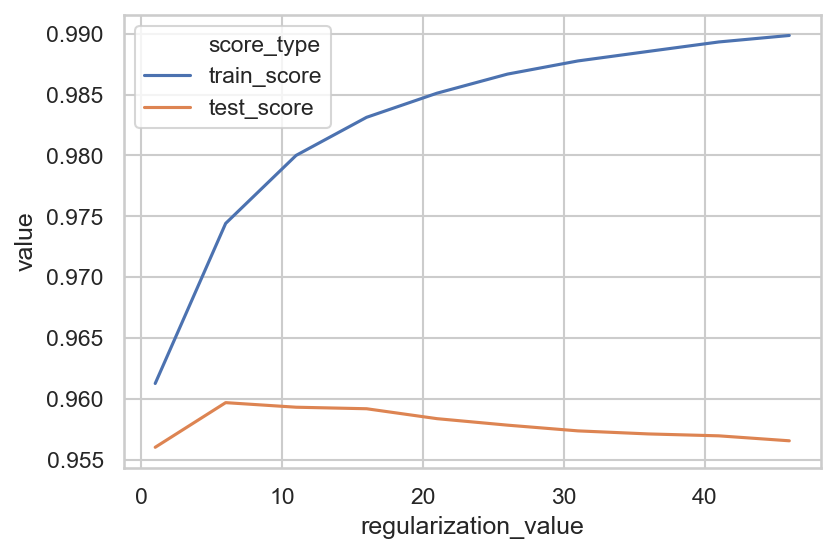

In [55]:
plt.rcParams['figure.dpi']= 150
ax = sns.lineplot(x="regularization_value", y="value", hue="score_type", data=score_df)

In [62]:
train_scores = []
test_scores = []
for regularization in np.arange(0.5, 50, 5):
    clf = LogisticRegression(dual=True, C=regularization, solver="liblinear", n_jobs=3).fit(X_train_tfidf, train["severe_toxic"])
    train_score = classification_report(train["severe_toxic"], clf.predict(X_train_tfidf), output_dict=True)
    test_score = classification_report(test["severe_toxic"], clf.predict(X_test_tfidf), output_dict=True)
    train_scores.append(train_score["accuracy"])
    test_scores.append(test_score["accuracy"])

In [63]:
train_scores_df = pd.concat([pd.DataFrame(train_scores, columns=["value"]), pd.DataFrame([x for x in np.arange(0.5, 50, 5)], columns=["regularization_value"]), pd.DataFrame(["train_score"]*len(train_scores), columns=["score_type"])], axis=1)
test_scores_df = pd.concat([pd.DataFrame(test_scores, columns=["value"]), pd.DataFrame([x for x in np.arange(0.5, 50, 5)], columns=["regularization_value"]), pd.DataFrame(["test_score"]*len(test_scores), columns=["score_type"])], axis=1)
score_df = train_scores_df.append(test_scores_df, ignore_index=True)

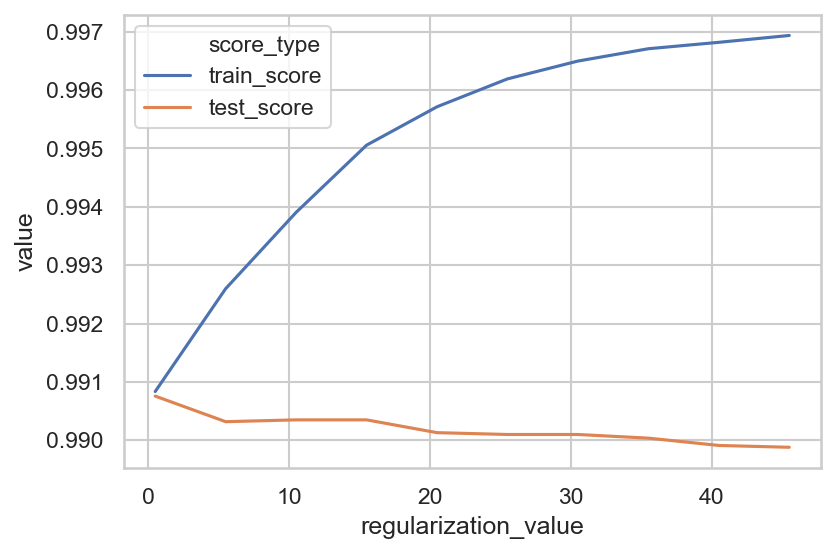

In [64]:
plt.rcParams['figure.dpi']= 150
ax = sns.lineplot(x="regularization_value", y="value", hue="score_type", data=score_df)

In [50]:
train_scores = []
test_scores = []
for regularization in np.arange(0.5, 50, 5):
    clf = LogisticRegression(dual=True, C=regularization, solver="liblinear").fit(X_train_tfidf, train["obscene"])
    train_score = classification_report(train["obscene"], clf.predict(X_train_tfidf), output_dict=True)
    test_score = classification_report(test["obscene"], clf.predict(X_test_tfidf), output_dict=True)
    train_scores.append(train_score["accuracy"])
    test_scores.append(test_score["accuracy"])

In [51]:
train_scores_df = pd.concat([pd.DataFrame(train_scores, columns=["value"]), pd.DataFrame([x for x in np.arange(0.5, 50, 5)], columns=["regularization_value"]), pd.DataFrame(["train_score"]*len(train_scores), columns=["score_type"])], axis=1)
test_scores_df = pd.concat([pd.DataFrame(test_scores, columns=["value"]), pd.DataFrame([x for x in np.arange(0.5, 50, 5)], columns=["regularization_value"]), pd.DataFrame(["test_score"]*len(test_scores), columns=["score_type"])], axis=1)
score_df = train_scores_df.append(test_scores_df, ignore_index=True)

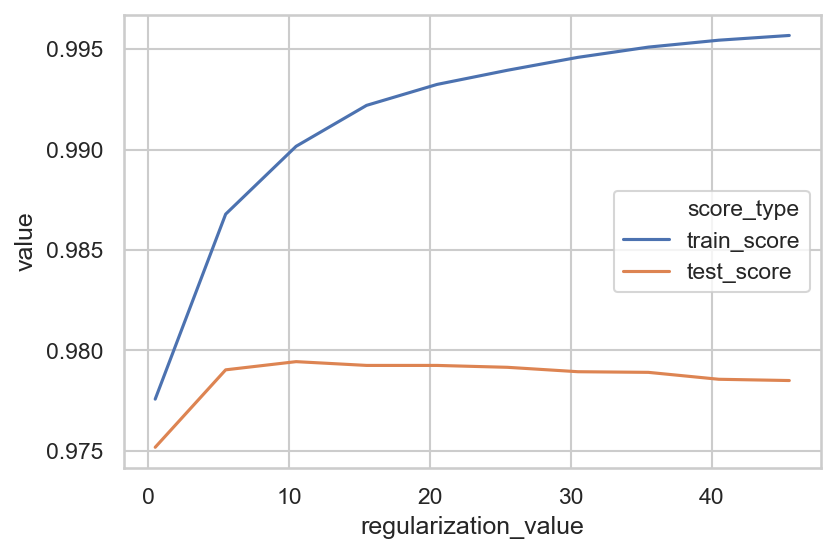

In [52]:
plt.rcParams['figure.dpi']= 150
ax = sns.lineplot(x="regularization_value", y="value", hue="score_type", data=score_df)

In [47]:
train_scores = []
test_scores = []
for regularization in np.arange(10, 100, 5):
    clf = LogisticRegression(dual=True, C=regularization, solver="liblinear").fit(X_train_tfidf, train["threat"])
    train_score = classification_report(train["threat"], clf.predict(X_train_tfidf), output_dict=True)
    test_score = classification_report(test["threat"], clf.predict(X_test_tfidf), output_dict=True)
    train_scores.append(train_score["accuracy"])
    test_scores.append(test_score["accuracy"])

/Users/rui/Documents/00_UNSW课程/L2_9417_Machine_Learning&DataMining/19T2/project/toxic_content_identifier/my_notebook/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [48]:
train_scores_df = pd.concat([pd.DataFrame(train_scores, columns=["value"]), pd.DataFrame([x for x in np.arange(10, 100, 5)], columns=["regularization_value"]), pd.DataFrame(["train_score"]*len(train_scores), columns=["score_type"])], axis=1)
test_scores_df = pd.concat([pd.DataFrame(test_scores, columns=["value"]), pd.DataFrame([x for x in np.arange(10, 100, 5)], columns=["regularization_value"]), pd.DataFrame(["test_score"]*len(test_scores), columns=["score_type"])], axis=1)
score_df = train_scores_df.append(test_scores_df, ignore_index=True)

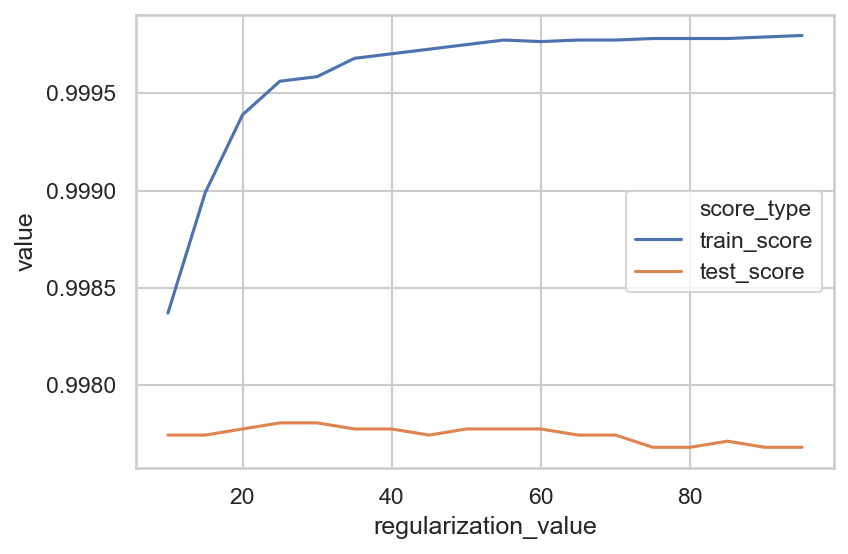

In [49]:
plt.rcParams['figure.dpi']= 150
ax = sns.lineplot(x="regularization_value", y="value", hue="score_type", data=score_df)

In [56]:
train_scores = []
test_scores = []
for regularization in np.arange(0.5, 50, 5):
    clf = LogisticRegression(dual=True, C=regularization, solver="liblinear").fit(X_train_tfidf, train["insult"])
    train_score = classification_report(train["insult"], clf.predict(X_train_tfidf), output_dict=True)
    test_score = classification_report(test["insult"], clf.predict(X_test_tfidf), output_dict=True)
    train_scores.append(train_score["accuracy"])
    test_scores.append(test_score["accuracy"])

In [57]:
train_scores_df = pd.concat([pd.DataFrame(train_scores, columns=["value"]), pd.DataFrame([x for x in np.arange(0.5, 50, 5)], columns=["regularization_value"]), pd.DataFrame(["train_score"]*len(train_scores), columns=["score_type"])], axis=1)
test_scores_df = pd.concat([pd.DataFrame(test_scores, columns=["value"]), pd.DataFrame([x for x in np.arange(0.5, 50, 5)], columns=["regularization_value"]), pd.DataFrame(["test_score"]*len(test_scores), columns=["score_type"])], axis=1)
score_df = train_scores_df.append(test_scores_df, ignore_index=True)

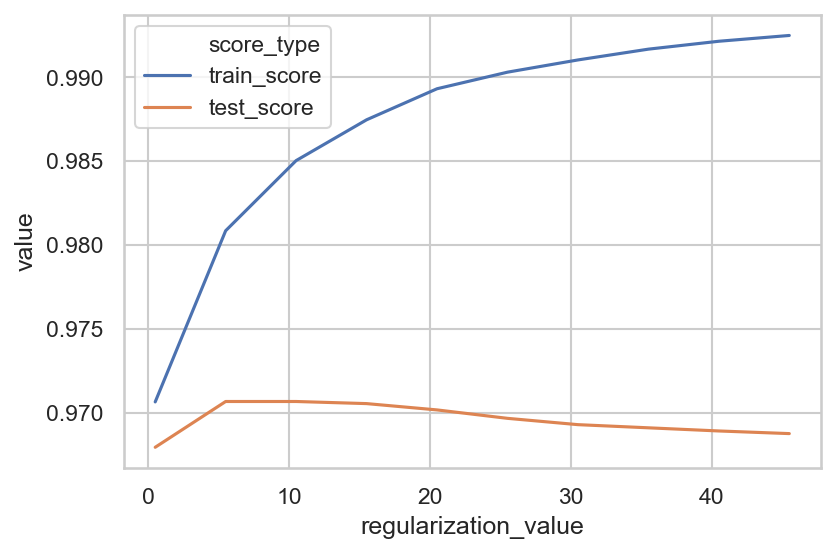

In [58]:
plt.rcParams['figure.dpi']= 150
ax = sns.lineplot(x="regularization_value", y="value", hue="score_type", data=score_df)

In [59]:
train_scores = []
test_scores = []
for regularization in np.arange(0.5, 50, 5):
    clf = LogisticRegression(dual=True, C=regularization, solver="liblinear").fit(X_train_tfidf, train["identity_hate"])
    train_score = classification_report(train["identity_hate"], clf.predict(X_train_tfidf), output_dict=True)
    test_score = classification_report(test["identity_hate"], clf.predict(X_test_tfidf), output_dict=True)
    train_scores.append(train_score["accuracy"])
    test_scores.append(test_score["accuracy"])

In [60]:
train_scores_df = pd.concat([pd.DataFrame(train_scores, columns=["value"]), pd.DataFrame([x for x in np.arange(0.5, 50, 5)], columns=["regularization_value"]), pd.DataFrame(["train_score"]*len(train_scores), columns=["score_type"])], axis=1)
test_scores_df = pd.concat([pd.DataFrame(test_scores, columns=["value"]), pd.DataFrame([x for x in np.arange(0.5, 50, 5)], columns=["regularization_value"]), pd.DataFrame(["test_score"]*len(test_scores), columns=["score_type"])], axis=1)
score_df = train_scores_df.append(test_scores_df, ignore_index=True)

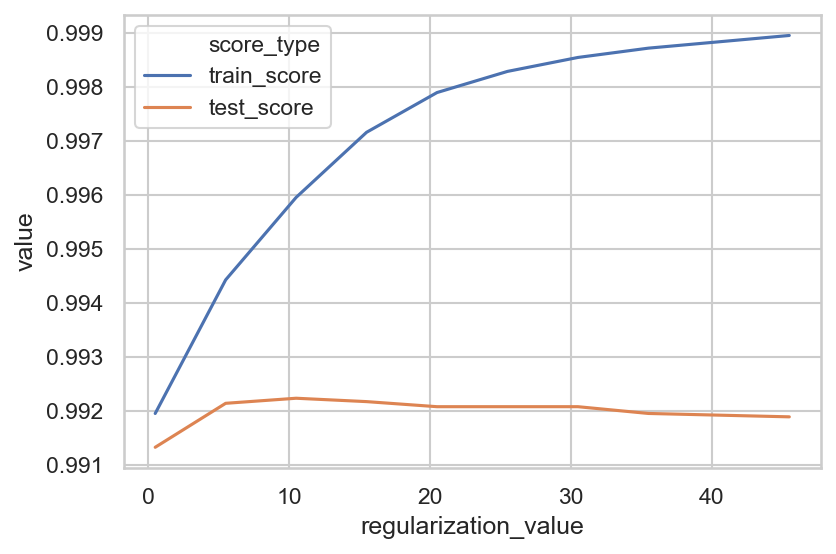

In [61]:
plt.rcParams['figure.dpi']= 150
ax = sns.lineplot(x="regularization_value", y="value", hue="score_type", data=score_df)

## Using cross validation to estimate logistic regression model

In [84]:
# sava number_of_tree parameter for each category
categories = {'toxic': 4, 'severe_toxic': 0.4, 'obscene': 4, 'threat': 10, 'insult': 4, 'identity_hate': 4}
categoryName = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [85]:
fold = 10
results = pd.DataFrame()
cross_validation_score_name = ['roc_auc']

for category in categories:
    # initialise logistic regression classifier
    clf = make_pipeline(TfidfVectorizer(stop_words="english"), LogisticRegression(dual=True, C=categories[category], solver="liblinear"))
    scores = cross_validate(clf, X_train, train[category], cv=fold, scoring="roc_auc")
    result = pd.DataFrame()
    for scn in cross_validation_score_name:
        result = result.append(pd.DataFrame(np.array([scores["test_score"],[scn]*fold]).T, columns=["value", "score_name"]), ignore_index=True)    
    cate = pd.DataFrame([category]*(len(cross_validation_score_name)*fold), columns=['category'])
    results = results.append(pd.concat([result, cate], axis=1), ignore_index=True)

results.head()

,value,score_name,category
0,0.9671200123901,roc_auc,toxic
1,0.9667069146725288,roc_auc,toxic
2,0.968166241110896,roc_auc,toxic
3,0.9687714476710803,roc_auc,toxic
4,0.9736956701469937,roc_auc,toxic


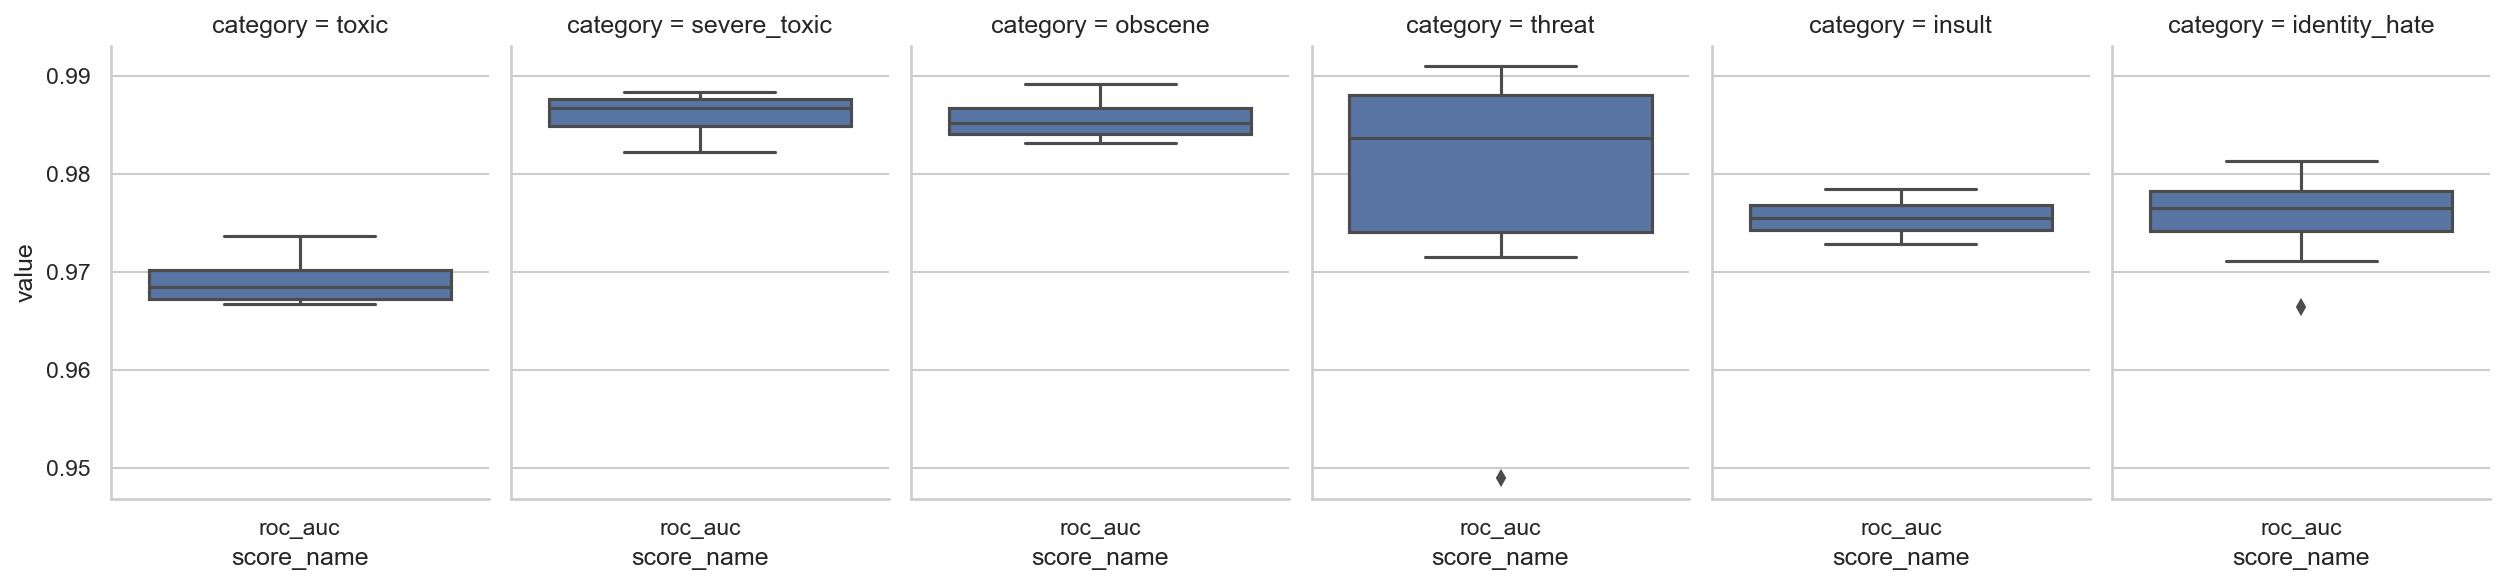

In [86]:
results["value"] = results.value.astype(float)
ax = sns.catplot(x="score_name", y="value", col="category", data=results, kind="box", height=4, aspect=.7);

In [87]:
compare = pd.concat([results,pd.DataFrame(["logisticRegression"]*60, columns=["model"])], axis=1)

In [88]:
compare.to_csv("logisticRegression.csv", index=False)

## Estimate logistic regression model on validation data using ROC

In [66]:
testData = pd.read_csv("cleaned_test_data.csv")
testLabel = pd.read_csv("test_labels.csv")
testDataMerge = pd.merge(left=testData,right=testLabel, left_on='id', right_on='id')
testDataMerge[categoryName] = testDataMerge[categoryName]

# drop rows if any column contains -1
selectValidRow = testDataMerge[categories].eq(-1).all(axis=1)
kaggle_test = testDataMerge.mask(selectValidRow).dropna(axis=0)
kaggle_test.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
5,0001ea8717f6de06,thank you for understanding i think very highl...,0.0,0.0,0.0,0.0,0.0,0.0
7,000247e83dcc1211,dear god this site is horrible,0.0,0.0,0.0,0.0,0.0,0.0
11,0002f87b16116a7f,somebody will invariably try to add religion r...,0.0,0.0,0.0,0.0,0.0,0.0
13,0003e1cccfd5a40a,it says it right there that it is a type the t...,0.0,0.0,0.0,0.0,0.0,0.0
14,00059ace3e3e9a53,before adding a new product to the list make s...,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
X_train_all = data.comment_text
X_test_kaggle = kaggle_test.comment_text

# Initialise CountVectorizer and fit all the training data
tfidf_vect = TfidfVectorizer(stop_words="english")
X_train_all_vec = tfidf_vect.fit_transform(X_train_all)
print('X_train_all_vec.shape: ', X_train_all_vec.shape)

X_test_kaggle_vec = tfidf_vect.transform(X_test_kaggle)
print('X_test_kaggle_vec.shape: ', X_test_kaggle_vec.shape)

X_train_all_vec.shape:  (159571, 59188)
X_test_kaggle_vec.shape:  (63959, 59188)


In [69]:
# Initialise TfidfVectorizer and fit all the splitted training data
tfidf_vect = TfidfVectorizer(stop_words="english")
X_train_vec = tfidf_vect.fit_transform(X_train)
print('X_train_vec.shape: ', X_train_vec.shape)

testSetX_vec = tfidf_vect.transform(X_test)
print('testSetX_vec.shape: ', testSetX_vec.shape)

X_train_vec.shape:  (127656, 56192)
testSetX_vec.shape:  (31915, 56192)


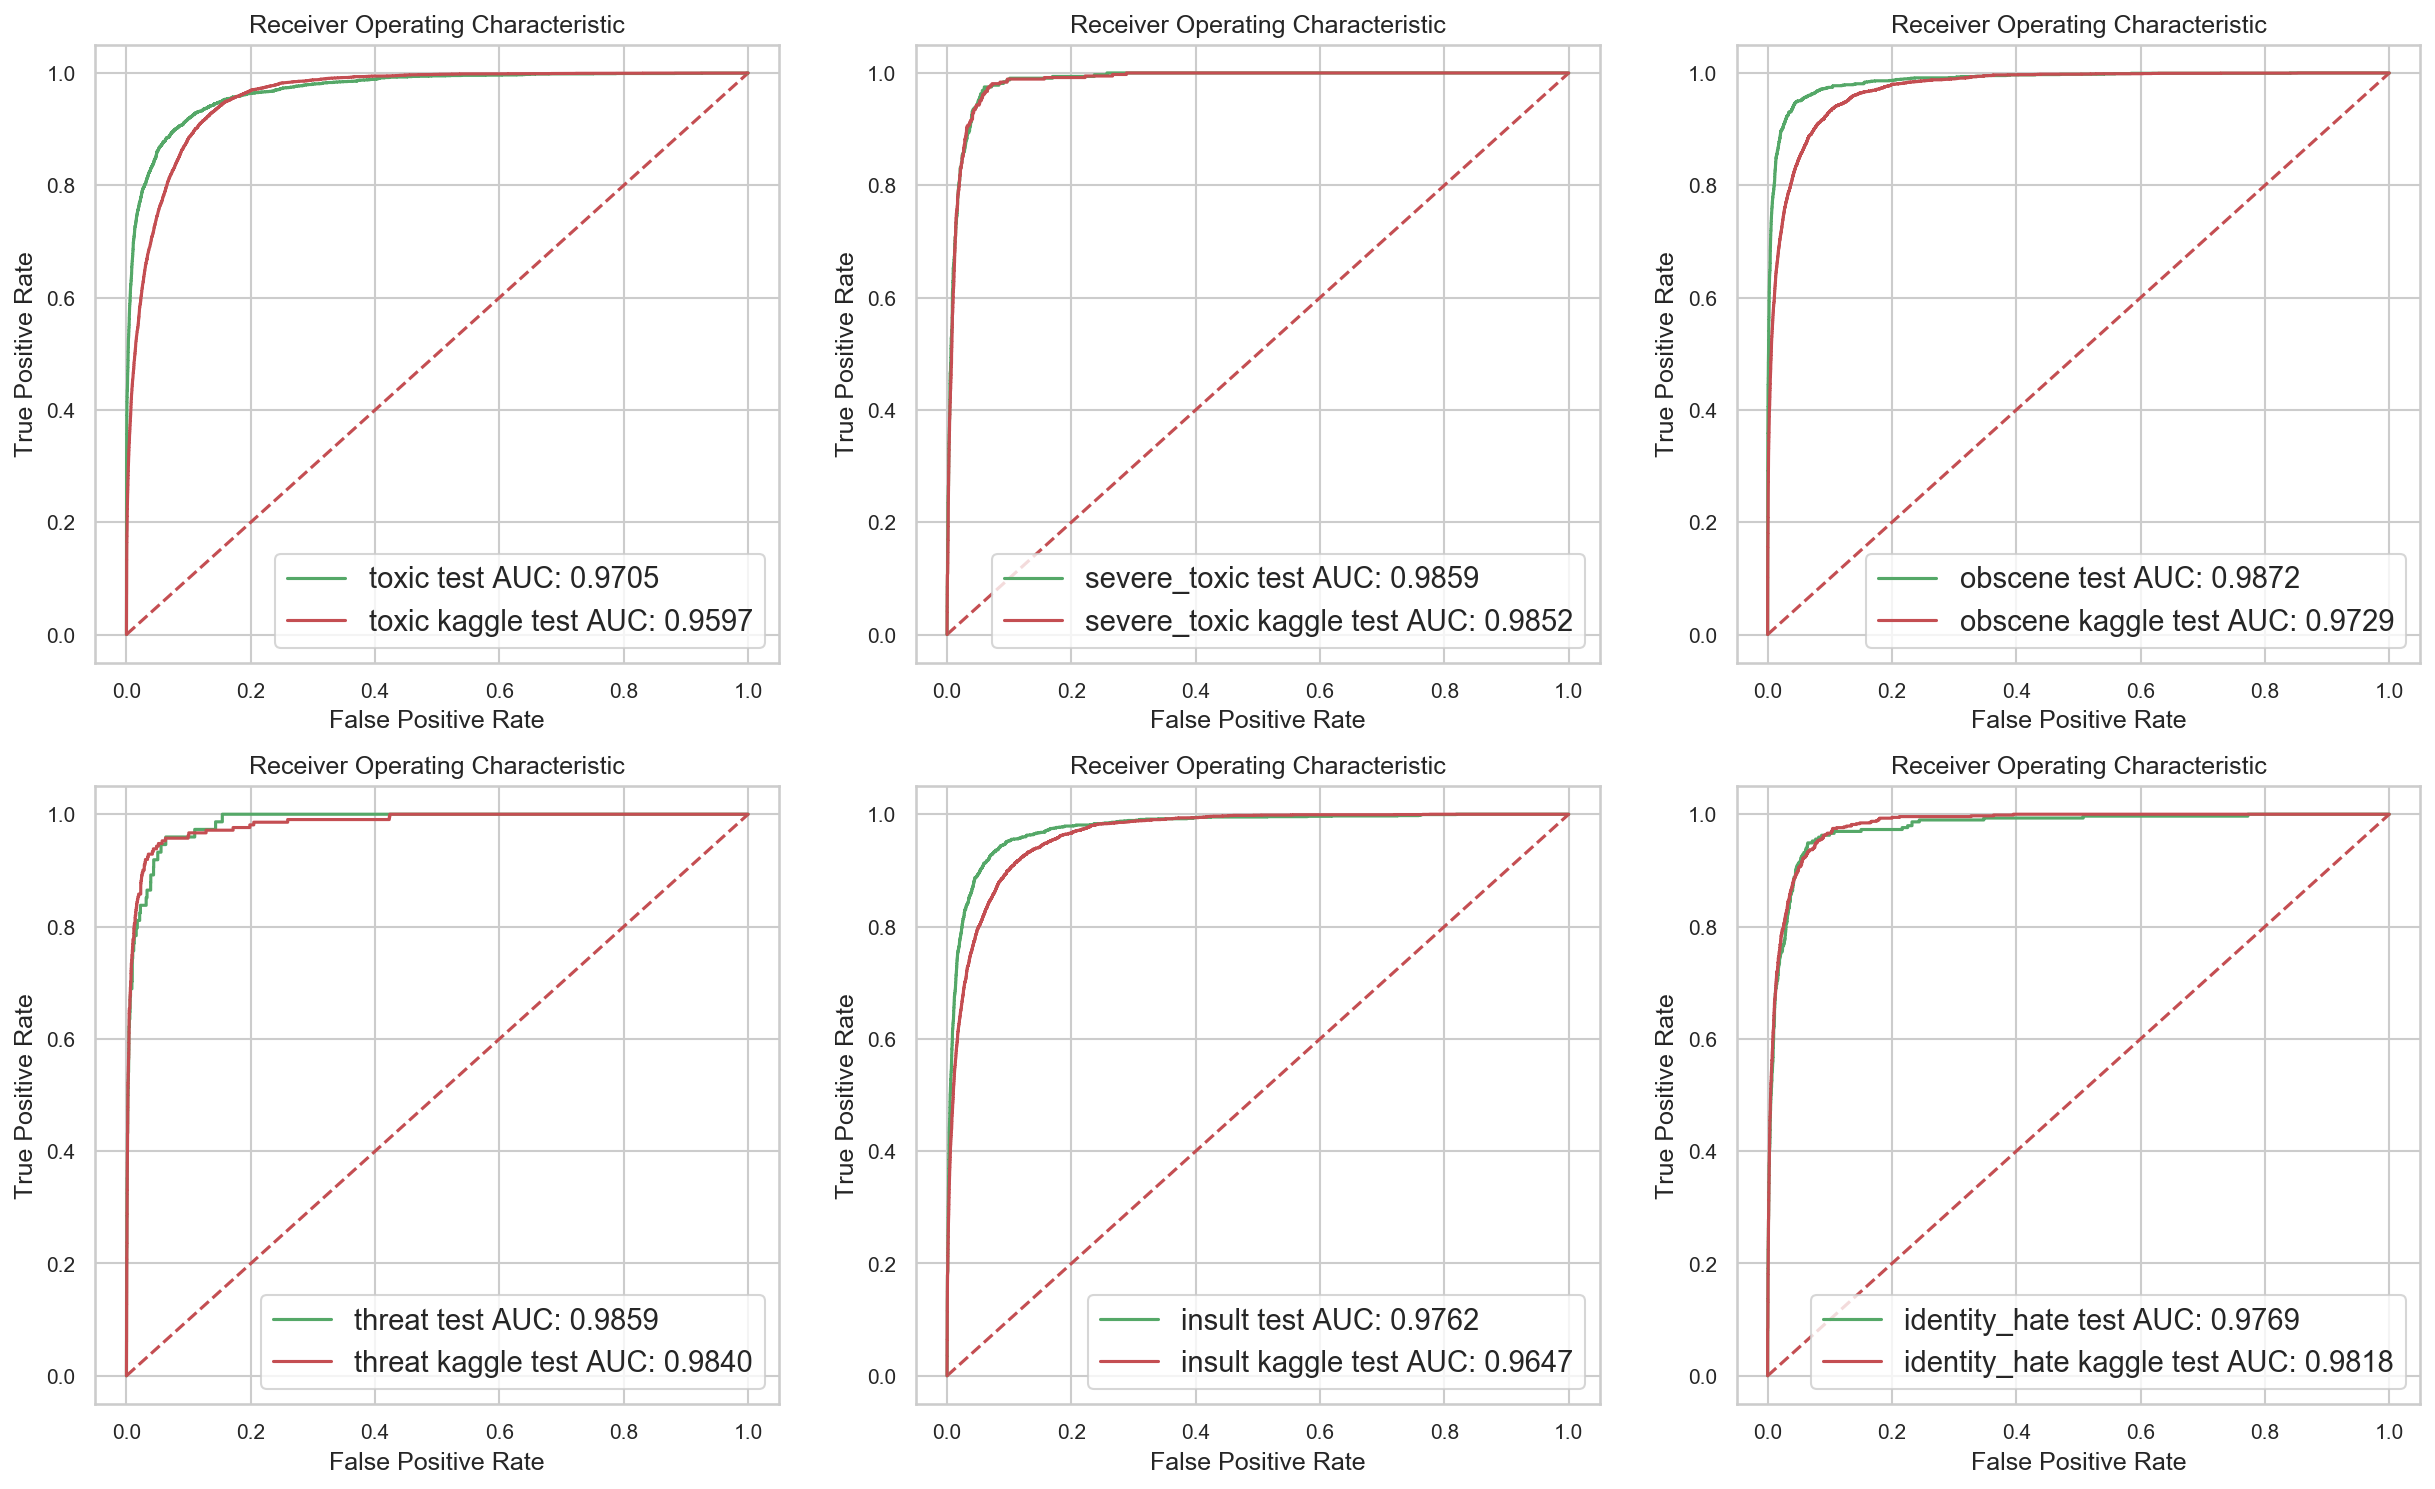

In [89]:
# plot roc curve for each category
fig2, axes = plt.subplots(nrows=2, ncols=3, figsize = (20, 12))
for i, ax in enumerate(axes.flatten()):
    # fit training split validation dataset
    clf = LogisticRegression(dual=True, C=categories[categoryName[i]], solver="liblinear").fit(X_train_vec, train[categoryName[i]])
    predictProbs = clf.predict_proba(testSetX_vec)
    predictProbs = predictProbs[:, 1]
    fpr, tpr, thresholds = roc_curve(test[categoryName[i]], predictProbs, pos_label=1)
    roc_auc = auc(fpr, tpr)

    label = '{} test AUC: {:.4f}'.format(categoryName[i], roc_auc)
    ax.plot([0,1], [0,1], 'r--')
    ax.plot(fpr, tpr, c = 'g', label = label)
    ax.set_title('Receiver Operating Characteristic', fontsize = 12)
    ax.set_xlabel('False Positive Rate', fontsize = 12)
    ax.set_ylabel('True Positive Rate', fontsize = 12)
    ax.tick_params(axis='both', which='major', labelsize=10)
    ax.tick_params(axis='both', which='minor', labelsize=10)
    
    # fit all the training set
    clf = LogisticRegression(dual=True, C=categories[categoryName[i]], solver="liblinear").fit(X_train_all_vec, data[categoryName[i]])
    predictProbs = clf.predict_proba(X_test_kaggle_vec)
    predictProbs = predictProbs[:, 1]
    fpr, tpr, thresholds = roc_curve(kaggle_test[categoryName[i]], predictProbs, pos_label=1)
    roc_auc = auc(fpr, tpr)
    
    label = '{} kaggle test AUC: {:.4f}'.format(categoryName[i], roc_auc)
    ax.plot(fpr, tpr, c = 'r', label = label)
    
    ax.legend(loc = 'lower right', fontsize = 14)